## Data Imputation with Matrix Factorization Techniques

Matrix factorization techniques are powerful tools used for imputing missing data. They assume that the data has an underlying low-rank structure, meaning most of the useful information in the dataset can be summarized by a smaller number of factors. These methods work particularly well when there are relationships or patterns in the data (e.g., correlations among features).

### What is a Low-Rank Structure?
Imagine a table with rows as students and columns as their grades in various subjects. If most students who are good at math are also good at physics, and those who are good at literature are good at history, we don't need the full dataset to understand the pattern. Instead, we can summarize the data using a smaller number of "hidden factors" like math-physics skill or literature-history interest. This summary (low-rank approximation) helps fill in the blanks when data is missing.

* **Iterative SVD:** Iterative SVD is a method that uses the SVD algorithm to decompose a matrix into simpler components repeatedly. It imputes missing values by finding a low-rank approximation of the dataset. 

* **Soft Impute:** Soft Impute is another matrix factorization method that assumes missing values can be imputed by minimizing the difference between the original data and its low-rank approximation, with a penalty on the complexity (rank). 

Both methods leverage the low-rank structure of the data, making them ideal for datasets where relationships between features can be captured by a few underlying factors. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
import numpy as np

from sklearn.model_selection import train_test_split
from fancyimpute import IterativeSVD, SoftImpute
import pingouin as pg

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


In [3]:
missing_data = dataset.isna().sum().sort_values()
missing_data

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
HipsSumAveragebaseline         1
MMSE0m                         3
ERCsASMbaseline                4
HipsSumVariancebaseline        7
HipsVariancebaseline           8
ERCsEntropybaseline            9
ERCsSumAveragebaseline        11
ERCsSumVariancebaseline       13
ERCsVariancebaseline          14
HipsContrastbaseline          14
ERCsVolumebaseline            14
ERCsContrastbaseline          18
HipsClusterShadebaseline      18
HipposcampusVolumebaseline    19
HipsCorelationbaseline        20
HipsEntropybaseline           23
HipsASMbaseline               25
ERCsCorelationbaseline        28
ERCsClusterShadebaseline      34
ERCs_thicknessbaseline        37
dtype: int64

In [4]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("Diagnosis", axis=1),  
    dataset["Diagnosis"],  
    test_size=0.3,  
    random_state=42,  
)

X_combined = pd.concat([X_train, X_test], axis=0)

In [5]:
# Initialize IterativeSVD for imputation
iterative_svd = IterativeSVD()

# Perform IterativeSVD Imputation on the combined dataset
X_combined_imputed_iterative = iterative_svd.fit_transform(X_combined)
X_train_imputed_iterative = X_combined_imputed_iterative[:len(X_train), :]
X_test_imputed_iterative = X_combined_imputed_iterative[len(X_train):, :]

softimpute = SoftImpute()
# Perform SoftImpute on the combined dataset
X_combined_imputed_soft = softimpute.fit_transform(X_combined)
X_train_imputed_soft = X_combined_imputed_soft[:len(X_train), :]
X_test_imputed_soft = X_combined_imputed_soft[len(X_train):, :]

[IterativeSVD] Iter 1: observed MAE=290.522514
[IterativeSVD] Iter 2: observed MAE=197.616056
[IterativeSVD] Iter 3: observed MAE=28.356853
[IterativeSVD] Iter 4: observed MAE=1.697254
[IterativeSVD] Iter 5: observed MAE=0.503289
[SoftImpute] Max Singular Value of X_init = 403977.444542
[SoftImpute] Iter 1: observed MAE=72.138084 rank=5
[SoftImpute] Iter 2: observed MAE=72.589102 rank=5
[SoftImpute] Iter 3: observed MAE=71.705811 rank=4
[SoftImpute] Iter 4: observed MAE=71.252901 rank=4
[SoftImpute] Iter 5: observed MAE=71.013974 rank=4
[SoftImpute] Iter 6: observed MAE=70.906418 rank=4
[SoftImpute] Iter 7: observed MAE=70.862595 rank=4
[SoftImpute] Iter 8: observed MAE=70.841562 rank=4
[SoftImpute] Iter 9: observed MAE=70.832763 rank=4
[SoftImpute] Iter 10: observed MAE=70.830568 rank=4
[SoftImpute] Iter 11: observed MAE=70.832055 rank=4
[SoftImpute] Iter 12: observed MAE=70.835160 rank=4
[SoftImpute] Iter 13: observed MAE=70.838895 rank=4
[SoftImpute] Iter 14: observed MAE=70.842834 

In [6]:
X_train_imputed_svd = pd.DataFrame(X_train_imputed_iterative, columns=X_train.columns)
X_test_imputed_svd = pd.DataFrame(X_test_imputed_iterative, columns=X_test.columns)

X_train_imputed_sm = pd.DataFrame(X_train_imputed_soft, columns=X_train.columns)
X_test_imputed_sm = pd.DataFrame(X_test_imputed_soft, columns=X_test.columns)

In [7]:
dataframes = [
    X_train_imputed_svd, X_test_imputed_svd, 
    X_train_imputed_sm, X_test_imputed_sm,
]

for df in dataframes:
    if df.isna().any().all() == False:
        print("No missing values in any dataframe")
        break
    else:
        print("Still missing values")

No missing values in any dataframe


### Check for normal distribution and skewness change 

In [8]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

def check_normality(dataset):
    
    results = {}

    for column in dataset.columns:  
        stat, p = shapiro(dataset[column].dropna())
        skewness = skew(dataset[column].dropna())
        kurt = kurtosis(dataset[column].dropna())
        results[column] = {'Statistic': stat, 'p-value': p, 'Skewness': skewness, 'Kurtosis': kurt, 'Normal': p > 0.05} 

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results).T
    return results_df

In [9]:
X_train_norm = check_normality(X_train)
X_test_norm = check_normality(X_test)

X_train_svd_norm = check_normality(X_train_imputed_svd)
X_test_svd_norm = check_normality(X_test_imputed_svd)

X_train_soft_norm = check_normality(X_train_imputed_sm)
X_test_soft_norm = check_normality(X_test_imputed_sm)

In [10]:
X_train_norm

,Statistic,p-value,Skewness,Kurtosis,Normal
RID,0.960571,0.0,-0.191996,-1.042352,False
Gender,0.629481,0.0,0.280362,-1.921397,False
Ageatscreening,0.98636,0.000507,-0.352696,0.074891,False
MMSE0m,0.899325,0.0,-0.86101,0.089239,False
HipsASMbaseline,0.962064,0.0,0.527045,-0.234448,False
HipsContrastbaseline,0.991863,0.022984,0.21891,-0.294576,False
HipsCorelationbaseline,0.973015,0.000001,-0.465003,-0.239129,False
HipsVariancebaseline,0.93952,0.0,-0.707282,-0.345891,False
HipsSumAveragebaseline,0.992093,0.023528,-0.087851,-0.465718,False
HipsSumVariancebaseline,0.93146,0.0,-0.775533,-0.258937,False


In [11]:
normal_train_df = pd.DataFrame({"X_train_norm": X_train_norm["Normal"],
                               "X_train_svd_norm": X_train_svd_norm["Normal"],
                               "X_train_soft_norm": X_train_soft_norm["Normal"],
    
})

normal_test_df = pd.DataFrame({"X_test_norm": X_test_norm["Normal"],
                               "X_test_svd_norm": X_test_svd_norm["Normal"],
                               "X_test_soft_norm": X_test_soft_norm["Normal"],
    
})

In [12]:
normal_train_df

,X_train_norm,X_train_svd_norm,X_train_soft_norm
RID,False,False,False
Gender,False,False,False
Ageatscreening,False,False,False
MMSE0m,False,False,False
HipsASMbaseline,False,False,False
HipsContrastbaseline,False,False,False
HipsCorelationbaseline,False,False,False
HipsVariancebaseline,False,False,False
HipsSumAveragebaseline,False,False,False
HipsSumVariancebaseline,False,False,False


In [13]:
print("Total normal distribution count for X_train_norm")
print(normal_train_df["X_train_norm"].value_counts())

print("\nTotal normal distribution count for X_train_svd_norm")
print(normal_train_df["X_train_svd_norm"].value_counts())

print("Total normal distribution count for X_train_soft_norm")
print(normal_train_df["X_train_soft_norm"].value_counts())

Total normal distribution count for X_train_norm
X_train_norm
False    20
True      3
Name: count, dtype: int64

Total normal distribution count for X_train_svd_norm
X_train_svd_norm
False    19
True      4
Name: count, dtype: int64
Total normal distribution count for X_train_soft_norm
X_train_soft_norm
False    22
True      1
Name: count, dtype: int64


In [14]:
normal_test_df

,X_test_norm,X_test_svd_norm,X_test_soft_norm
RID,False,False,False
Gender,False,False,False
Ageatscreening,False,False,False
MMSE0m,False,False,False
HipsASMbaseline,False,False,False
HipsContrastbaseline,True,True,True
HipsCorelationbaseline,False,False,False
HipsVariancebaseline,False,False,False
HipsSumAveragebaseline,False,False,False
HipsSumVariancebaseline,False,False,False


In [15]:
print("Total normal distribution count for X_test_norm")
print(normal_test_df["X_test_norm"].value_counts())

print("\nTotal normal distribution count for X_test_svd_norm")
print(normal_test_df["X_test_svd_norm"].value_counts())

print("Total normal distribution count for X_test_soft_norm")
print(normal_test_df["X_test_soft_norm"].value_counts())

Total normal distribution count for X_test_norm
X_test_norm
False    13
True     10
Name: count, dtype: int64

Total normal distribution count for X_test_svd_norm
X_test_svd_norm
False    15
True      8
Name: count, dtype: int64
Total normal distribution count for X_test_soft_norm
X_test_soft_norm
False    17
True      6
Name: count, dtype: int64


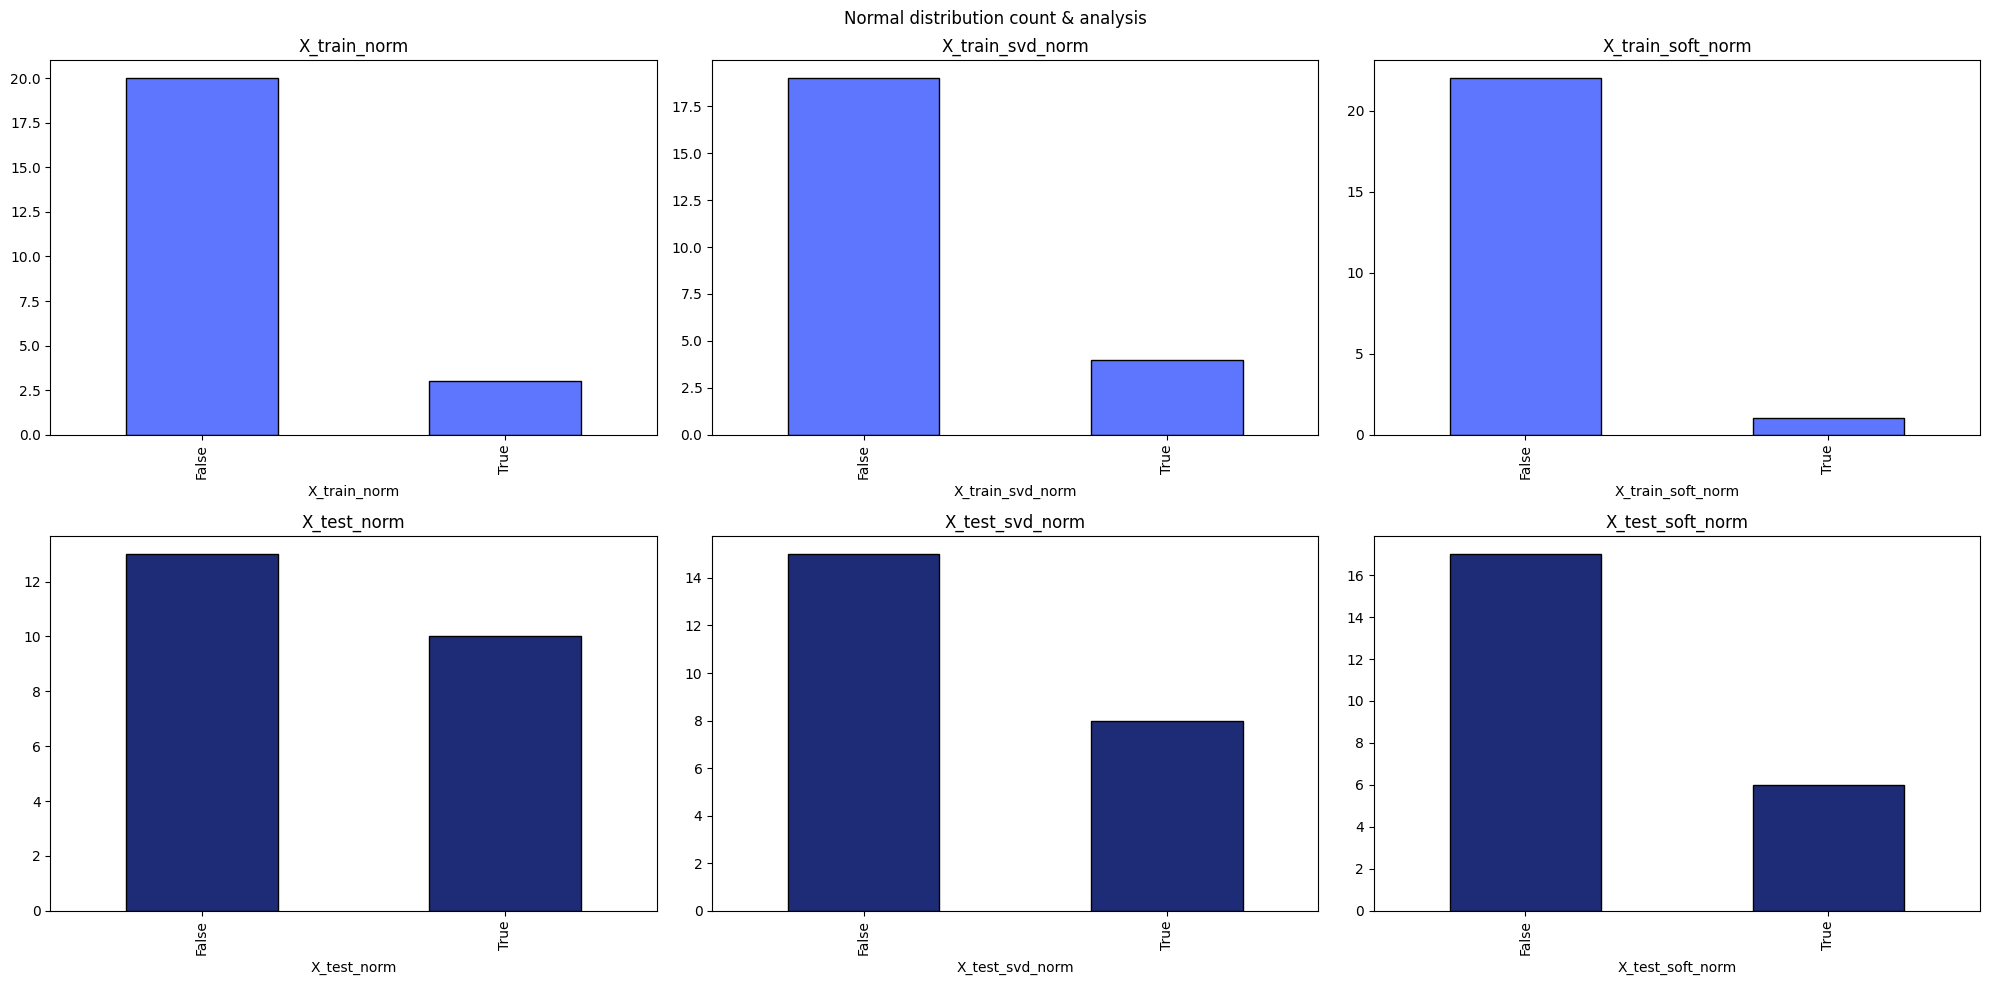

In [16]:
plt.figure(figsize=(20,10))
plt.suptitle("Normal distribution count & analysis")

plt.subplot(2, 3, 1)
normal_train_df["X_train_norm"].value_counts().plot(kind="bar",
                                             color = "#5e76fe",
                                             edgecolor = "black",
                                             label = "x_train")
plt.title("X_train_norm")

plt.subplot(2, 3, 2)
normal_train_df["X_train_svd_norm"].value_counts().plot(kind="bar",
                                             color = "#5e76fe",
                                             edgecolor = "black",
                                             label = "normal_svd_train")
plt.title("X_train_svd_norm")

plt.subplot(2, 3, 3)
normal_train_df["X_train_soft_norm"].value_counts().plot(kind="bar",
                                             color = "#5e76fe",
                                             edgecolor = "black",
                                             label = "normal_soft_train")
plt.title("X_train_soft_norm")

plt.subplot(2, 3, 4)
normal_test_df["X_test_norm"].value_counts().plot(kind="bar",
                                             color = "#1e2c78",
                                             edgecolor = "black",
                                             label = "normal_X_test")
plt.title("X_test_norm")

plt.subplot(2, 3, 5)
normal_test_df["X_test_svd_norm"].value_counts().plot(kind="bar",
                                             color = "#1e2c78",
                                             edgecolor = "black",
                                             label = "normal_svd_test")
plt.title("X_test_svd_norm")

plt.subplot(2, 3, 6)
normal_test_df["X_test_soft_norm"].value_counts().plot(kind="bar",
                                             color = "#1e2c78",
                                             edgecolor = "black",
                                             label = "normal_soft_test")
plt.title("X_test_soft_norm")

plt.tight_layout()

### Lets use a KDE plot 

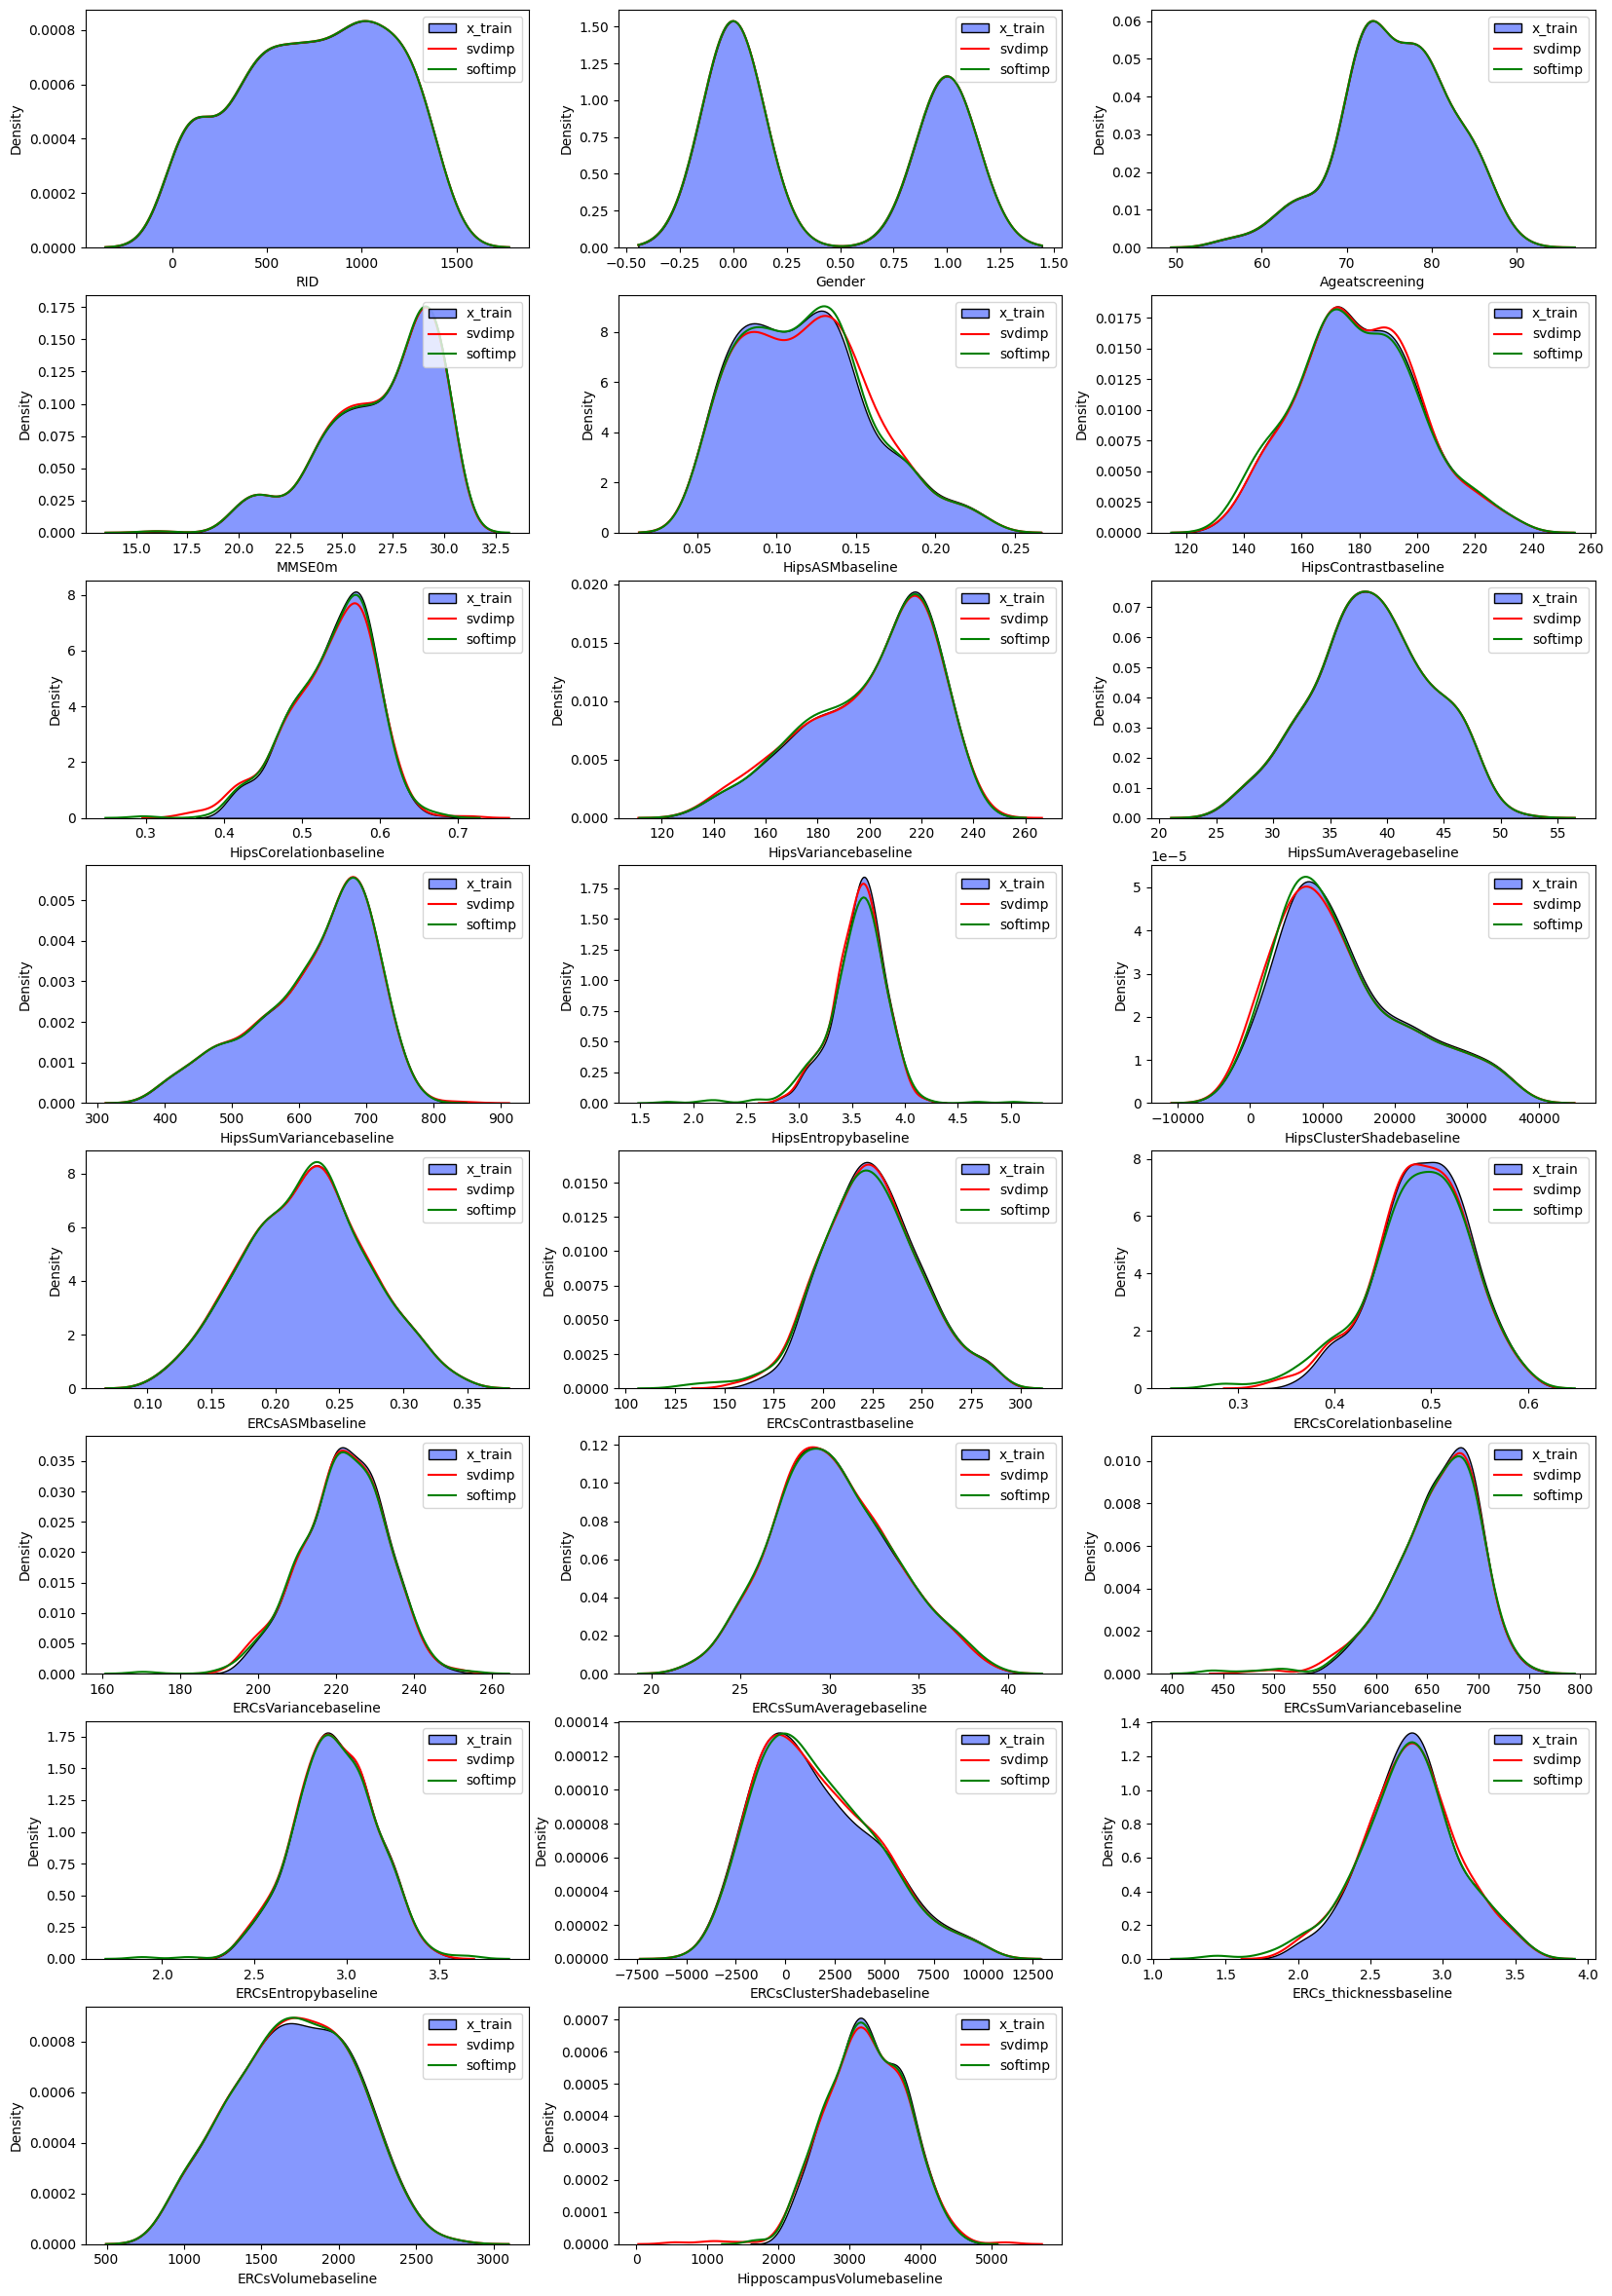

In [17]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train[X_train.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_imputed_svd[X_train_imputed_svd.columns[i]], color= "red")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_imputed_sm[X_train_imputed_sm.columns[i]], color= "green")
    
    labels = ['x_train', 'svdimp', 'softimp']
    plt.legend(labels, loc='upper right')

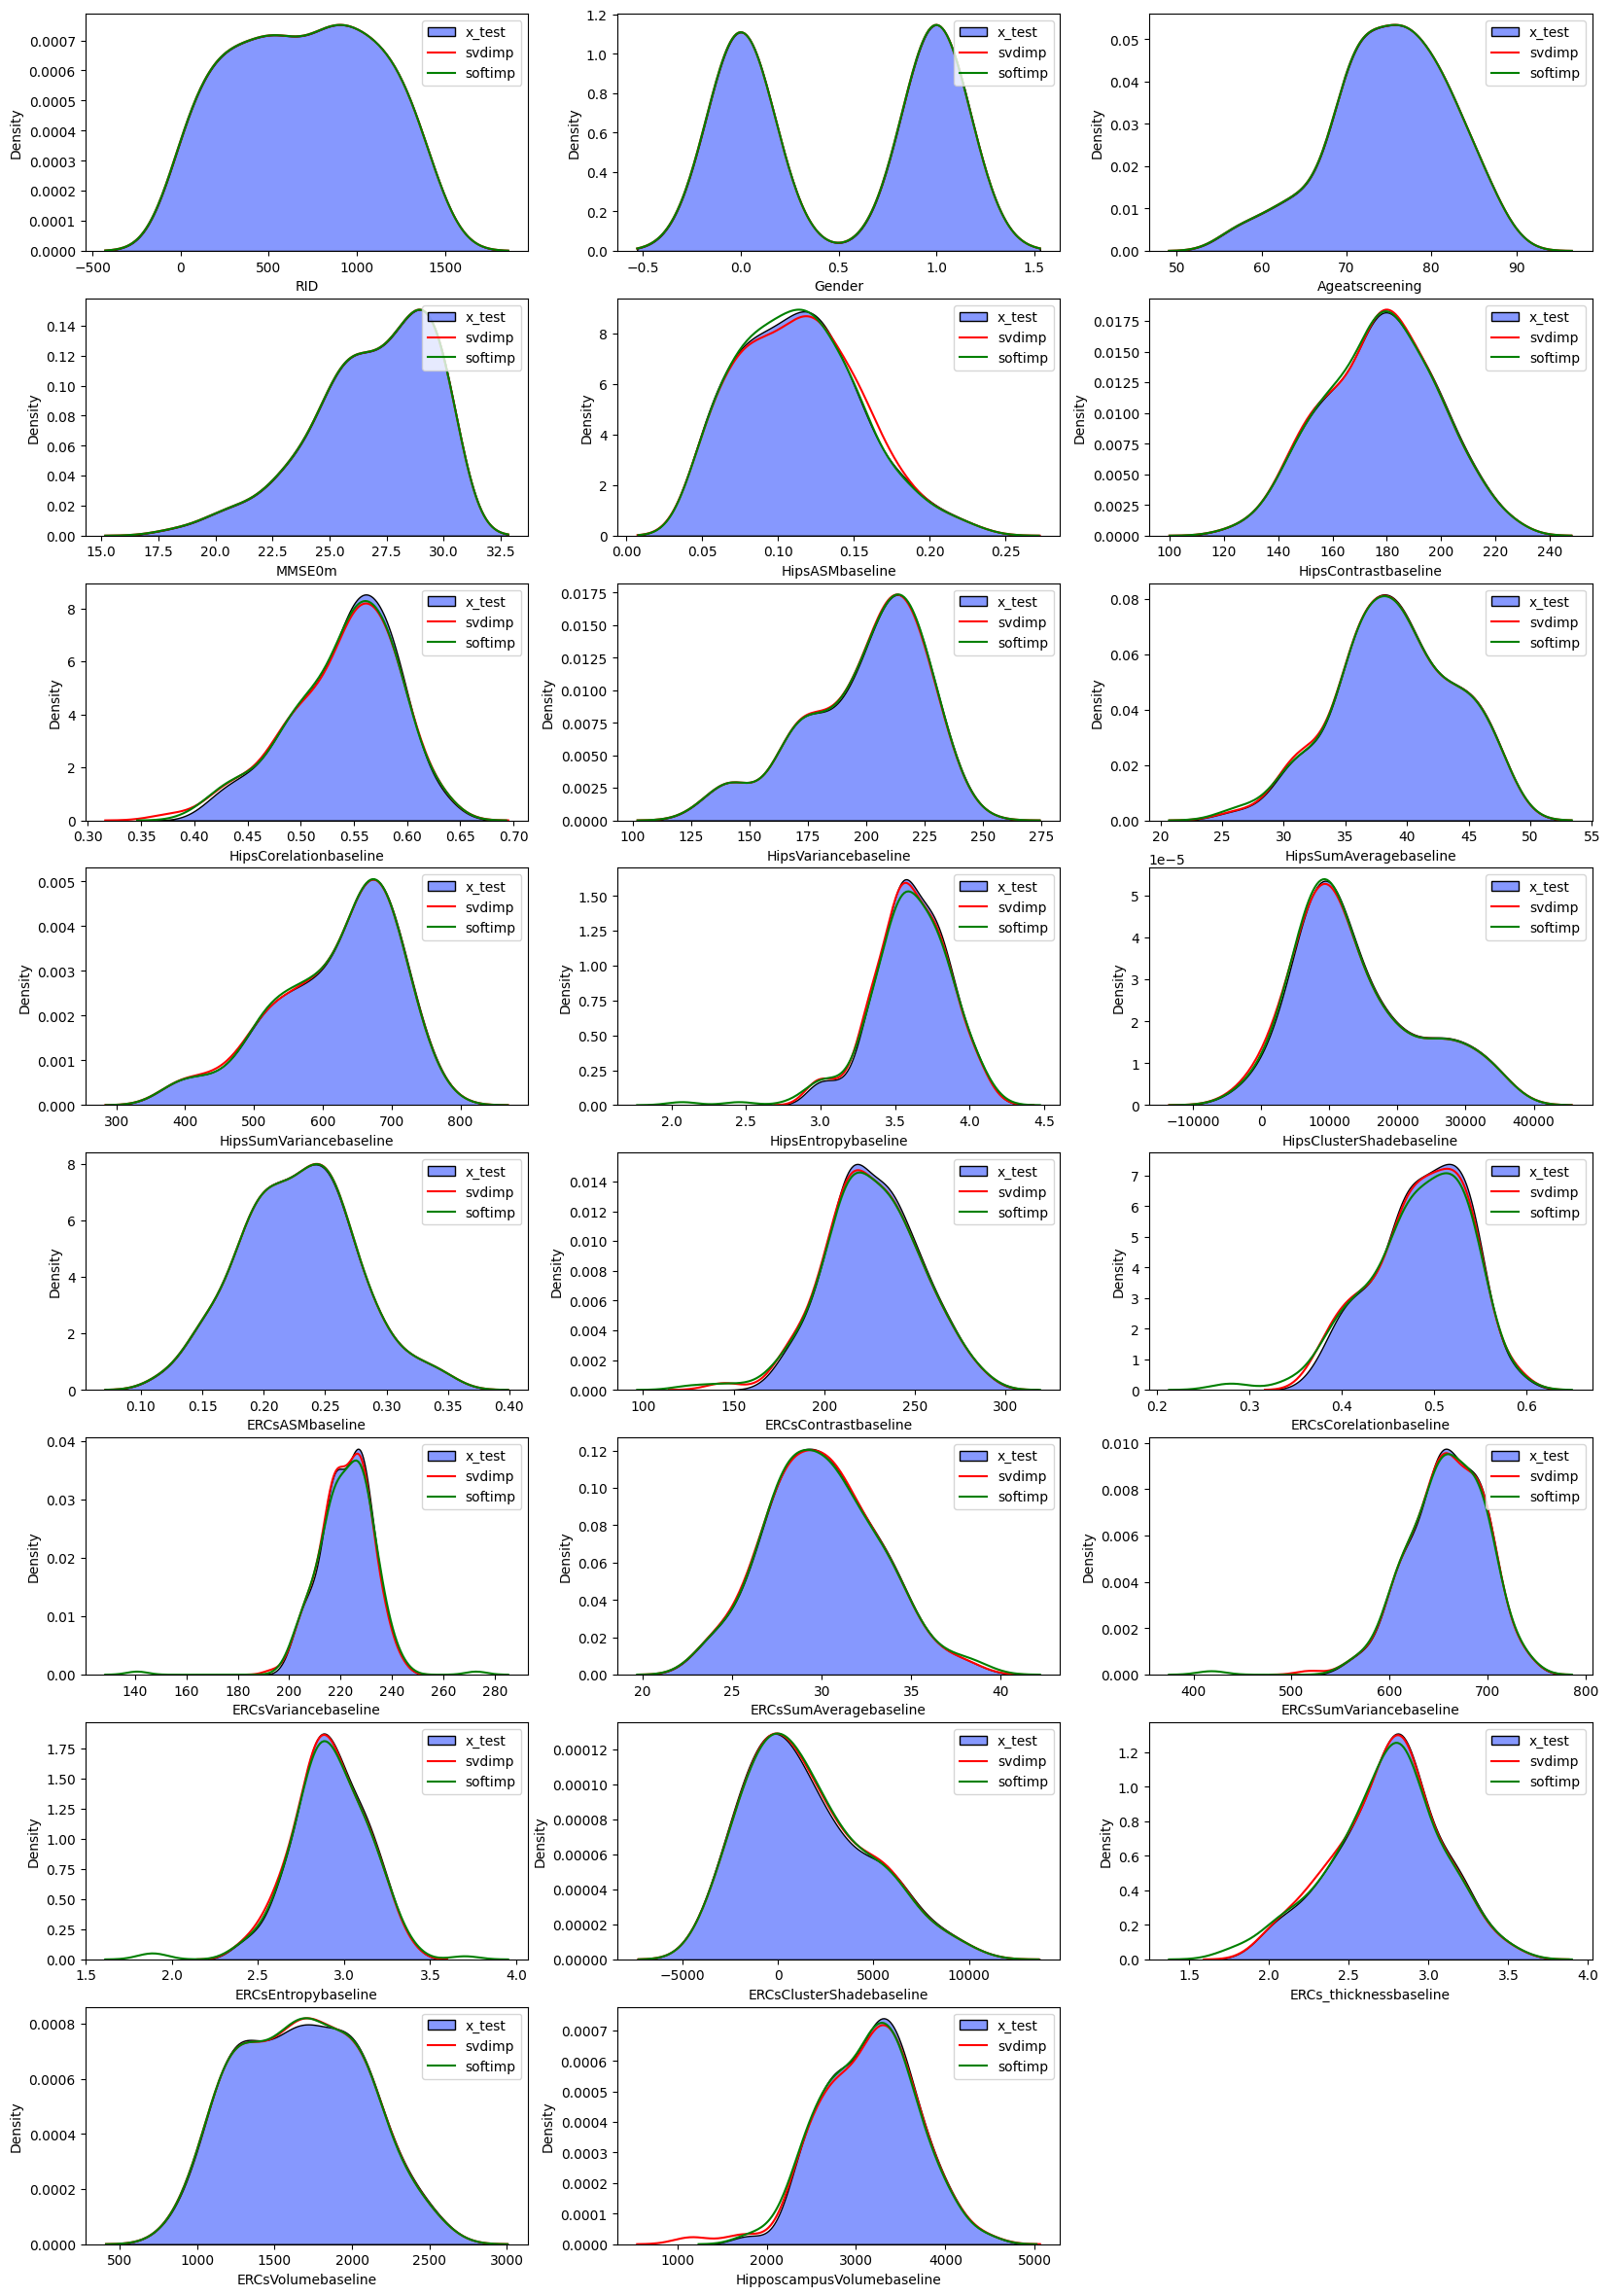

In [18]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_test.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test[X_test.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_imputed_svd[X_test_imputed_svd.columns[i]], color= "red")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_imputed_sm[X_test_imputed_sm.columns[i]], color= "green")
    
    labels = ['x_test', 'svdimp', 'softimp']
    plt.legend(labels, loc='upper right')

### Check for variance change

In [24]:
variance_train_df = pd.DataFrame({"X_train_std": X_train.var(),
              "X_train IterSVD std": X_train_imputed_svd.var(),
              "X_train Soft std": X_train_imputed_sm.var()
            }
)

variance_train_df["Changed"] = (variance_train_df.nunique(axis=1) > 1)

variance_test_df = pd.DataFrame({"X_test_std": X_test.var(),
              "X_test IterSVD std": X_test_imputed_svd.var(),
              "X_test Soft std": X_test_imputed_sm.var()
            }
)

variance_test_df["Changed"] = (variance_test_df.nunique(axis=1) > 1)

In [26]:
variance_train_df

,X_train_std,X_train IterSVD std,X_train Soft std,Changed
RID,1.563815e+05,1.563815e+05,1.563815e+05,False
Gender,2.457603e-01,2.457603e-01,2.457603e-01,False
Ageatscreening,4.307941e+01,4.307941e+01,4.307941e+01,False
MMSE0m,7.689551e+00,7.645911e+00,7.677401e+00,True
HipsASMbaseline,1.686332e-03,1.680364e-03,1.650234e-03,True
HipsContrastbaseline,4.227328e+02,4.171954e+02,4.380135e+02,True
HipsCorelationbaseline,2.584648e-03,3.155507e-03,2.860888e-03,True
HipsVariancebaseline,5.847527e+02,6.066334e+02,5.847790e+02,True
HipsSumAveragebaseline,2.642004e+01,2.642004e+01,2.642004e+01,False
HipsSumVariancebaseline,7.585556e+03,7.667458e+03,7.563868e+03,True


In [27]:
print(variance_train_df["Changed"].value_counts())

Changed
True     19
False     4
Name: count, dtype: int64


In [52]:
variance_test_df

,X_test_std,X_test IterSVD std,X_test Soft std,Changed
RID,1.654556e+05,1.654556e+05,1.654556e+05,False
Gender,2.513061e-01,2.513061e-01,2.513061e-01,False
Ageatscreening,4.862086e+01,4.862086e+01,4.862086e+01,False
MMSE0m,7.112112e+00,7.112112e+00,7.112112e+00,False
HipsASMbaseline,1.611935e-03,1.618759e-03,1.578642e-03,True
HipsContrastbaseline,4.375496e+02,4.345852e+02,4.322964e+02,True
HipsCorelationbaseline,2.353091e-03,2.698532e-03,2.513673e-03,True
HipsVariancebaseline,6.732886e+02,6.670415e+02,6.688668e+02,True
HipsSumAveragebaseline,2.277794e+01,2.296645e+01,2.348389e+01,True
HipsSumVariancebaseline,7.896207e+03,7.925923e+03,7.825458e+03,True


In [29]:
print(variance_test_df["Changed"].value_counts())

Changed
True     19
False     4
Name: count, dtype: int64


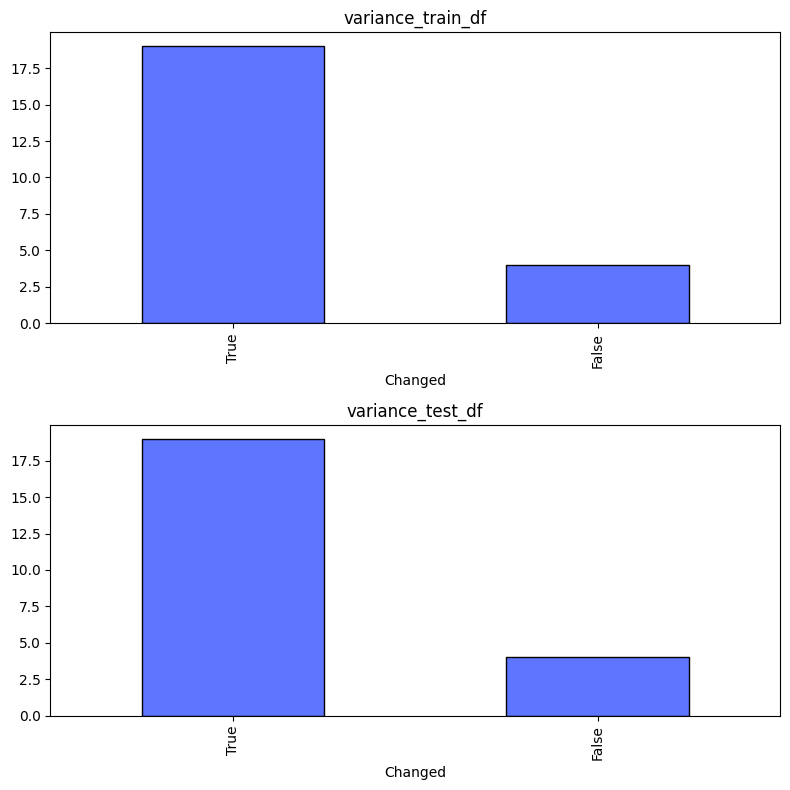

In [35]:
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
variance_train_df["Changed"].value_counts().plot(kind="bar",
                                           color = "#5e76fe",
                                           edgecolor = "black",
)

plt.title("variance_train_df")

plt.subplot(2,1,2)
variance_test_df["Changed"].value_counts().plot(kind="bar",
                                           color = "#5e76fe",
                                           edgecolor = "black",
)

plt.title("variance_test_df")

plt.tight_layout()

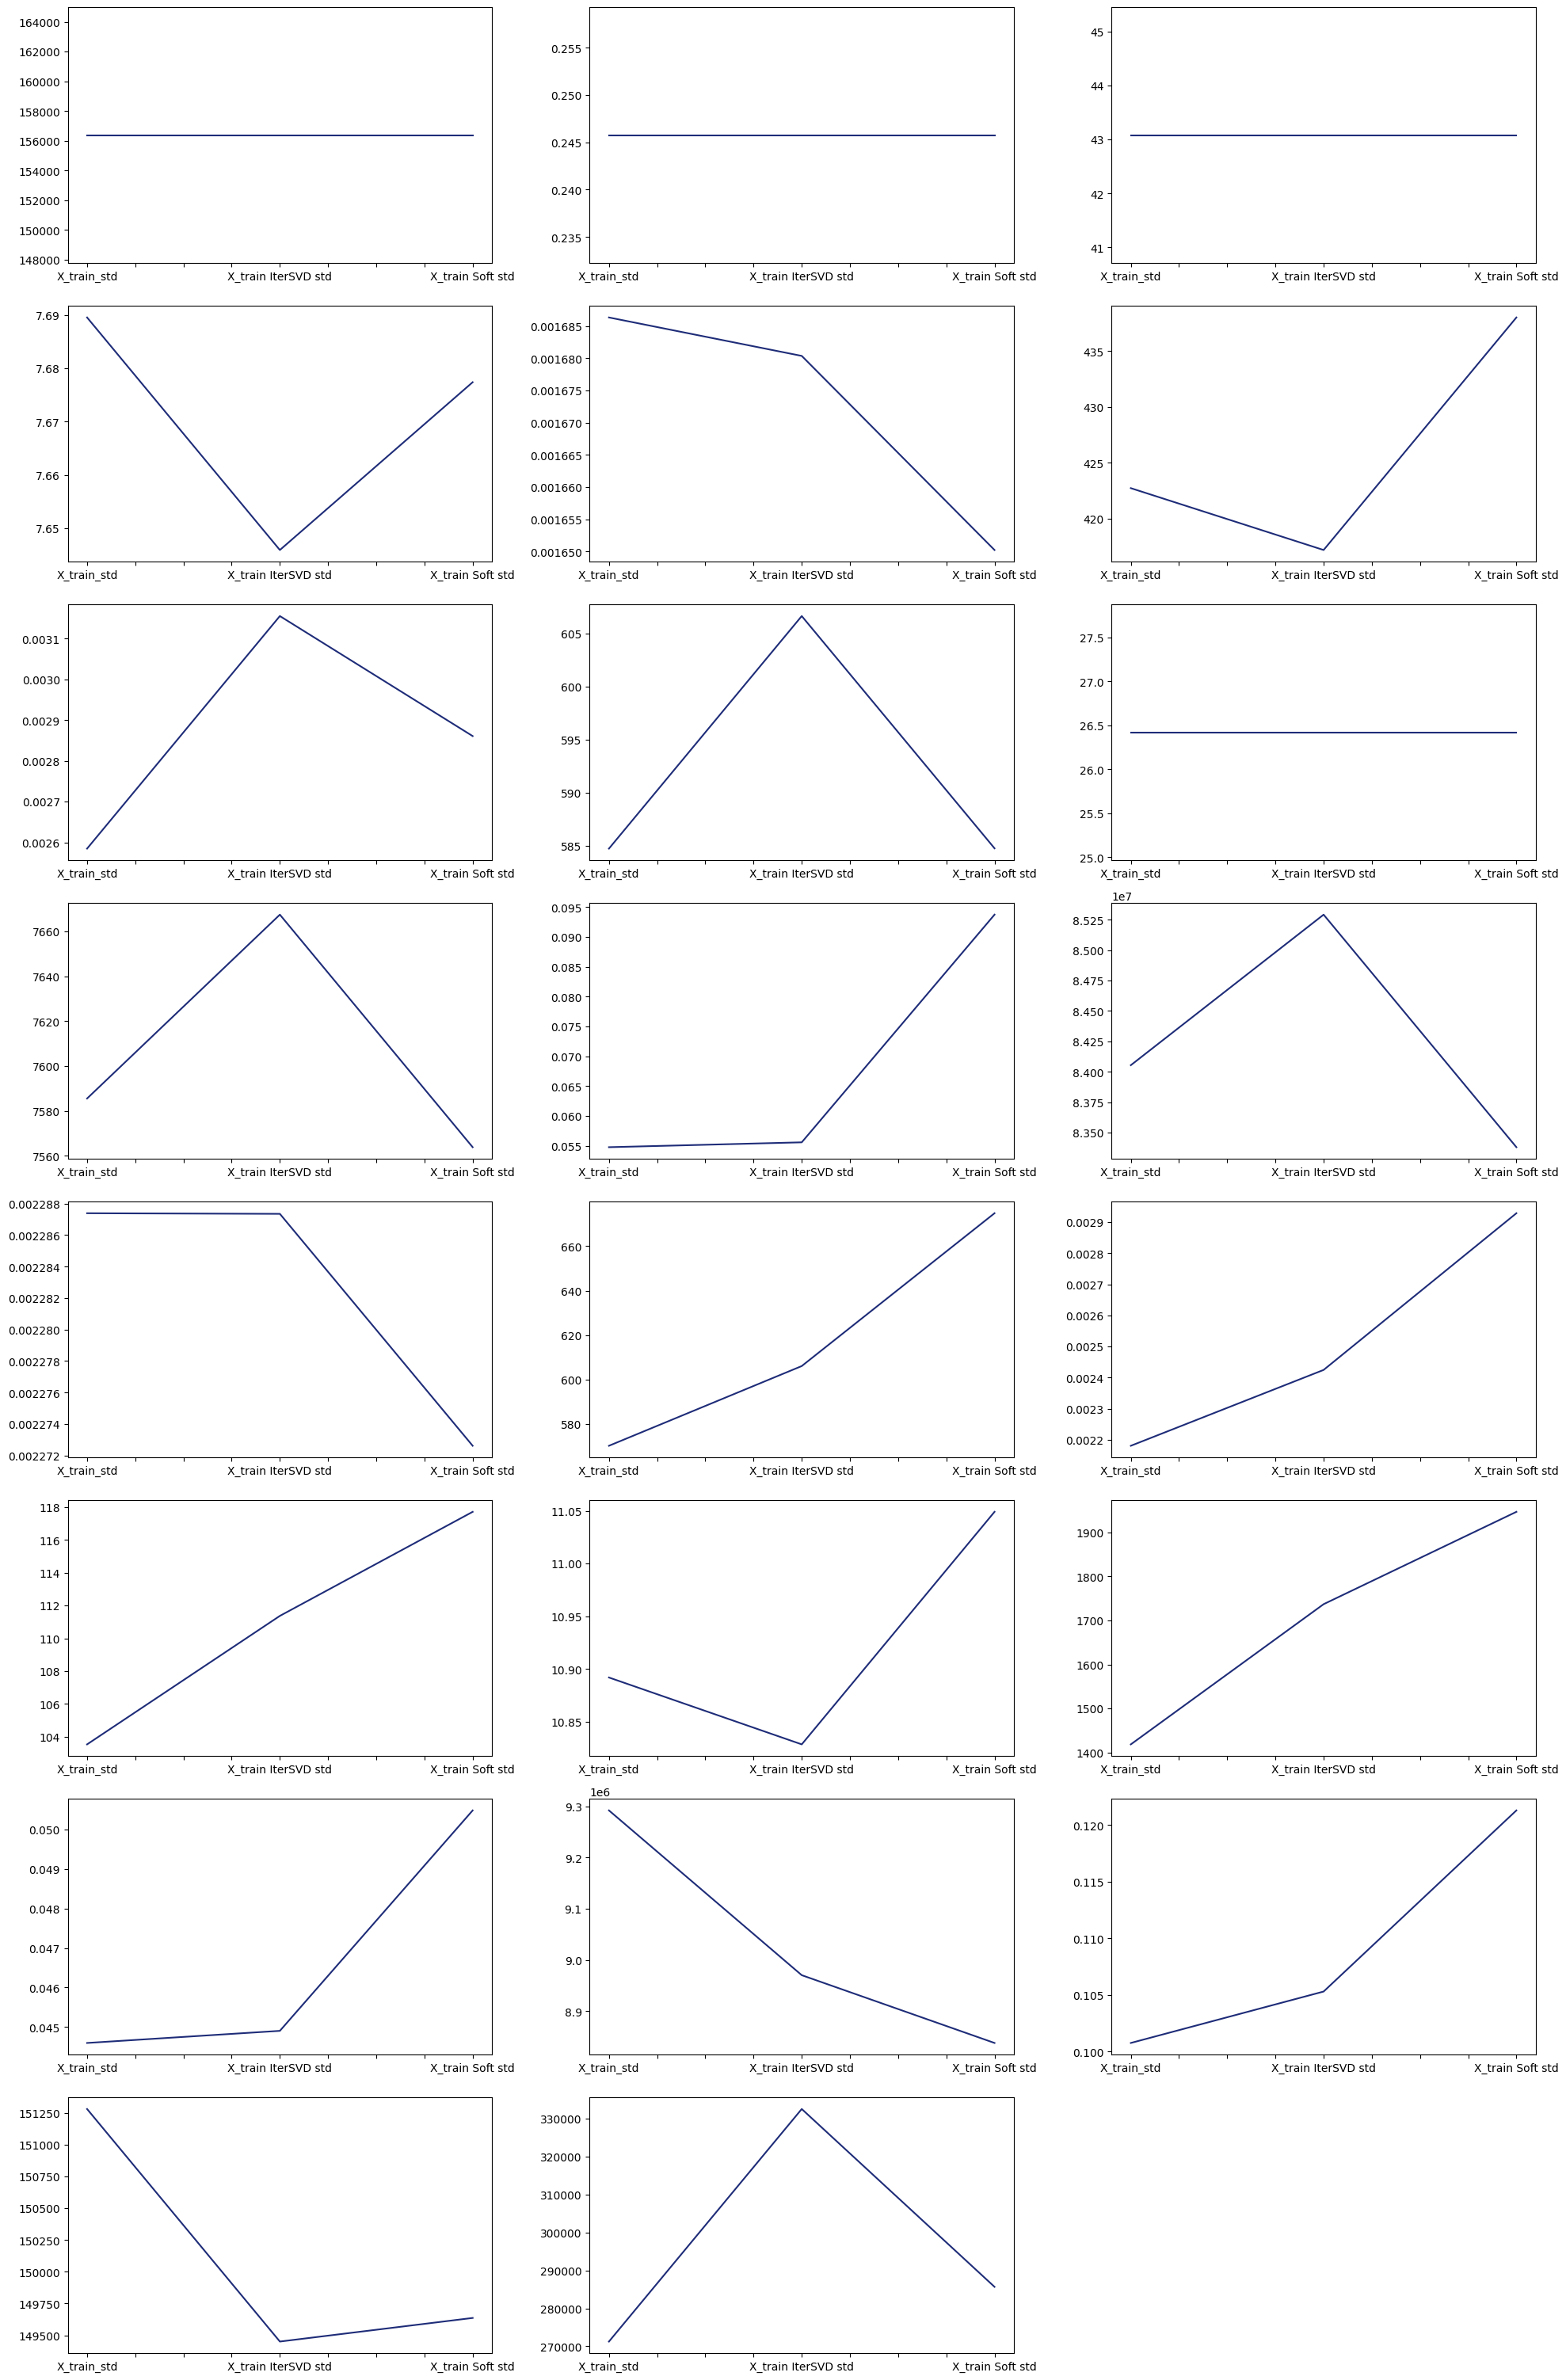

In [53]:
plt.figure(figsize=(20, 45))

for i in range(len(variance_train_df)):
    plt.subplot(12,3,i+1)
    variance_train_df.iloc[i].drop("Changed").plot(kind="line",
                                             color="#1e2c78",
    )
    
plt.tight_layout()

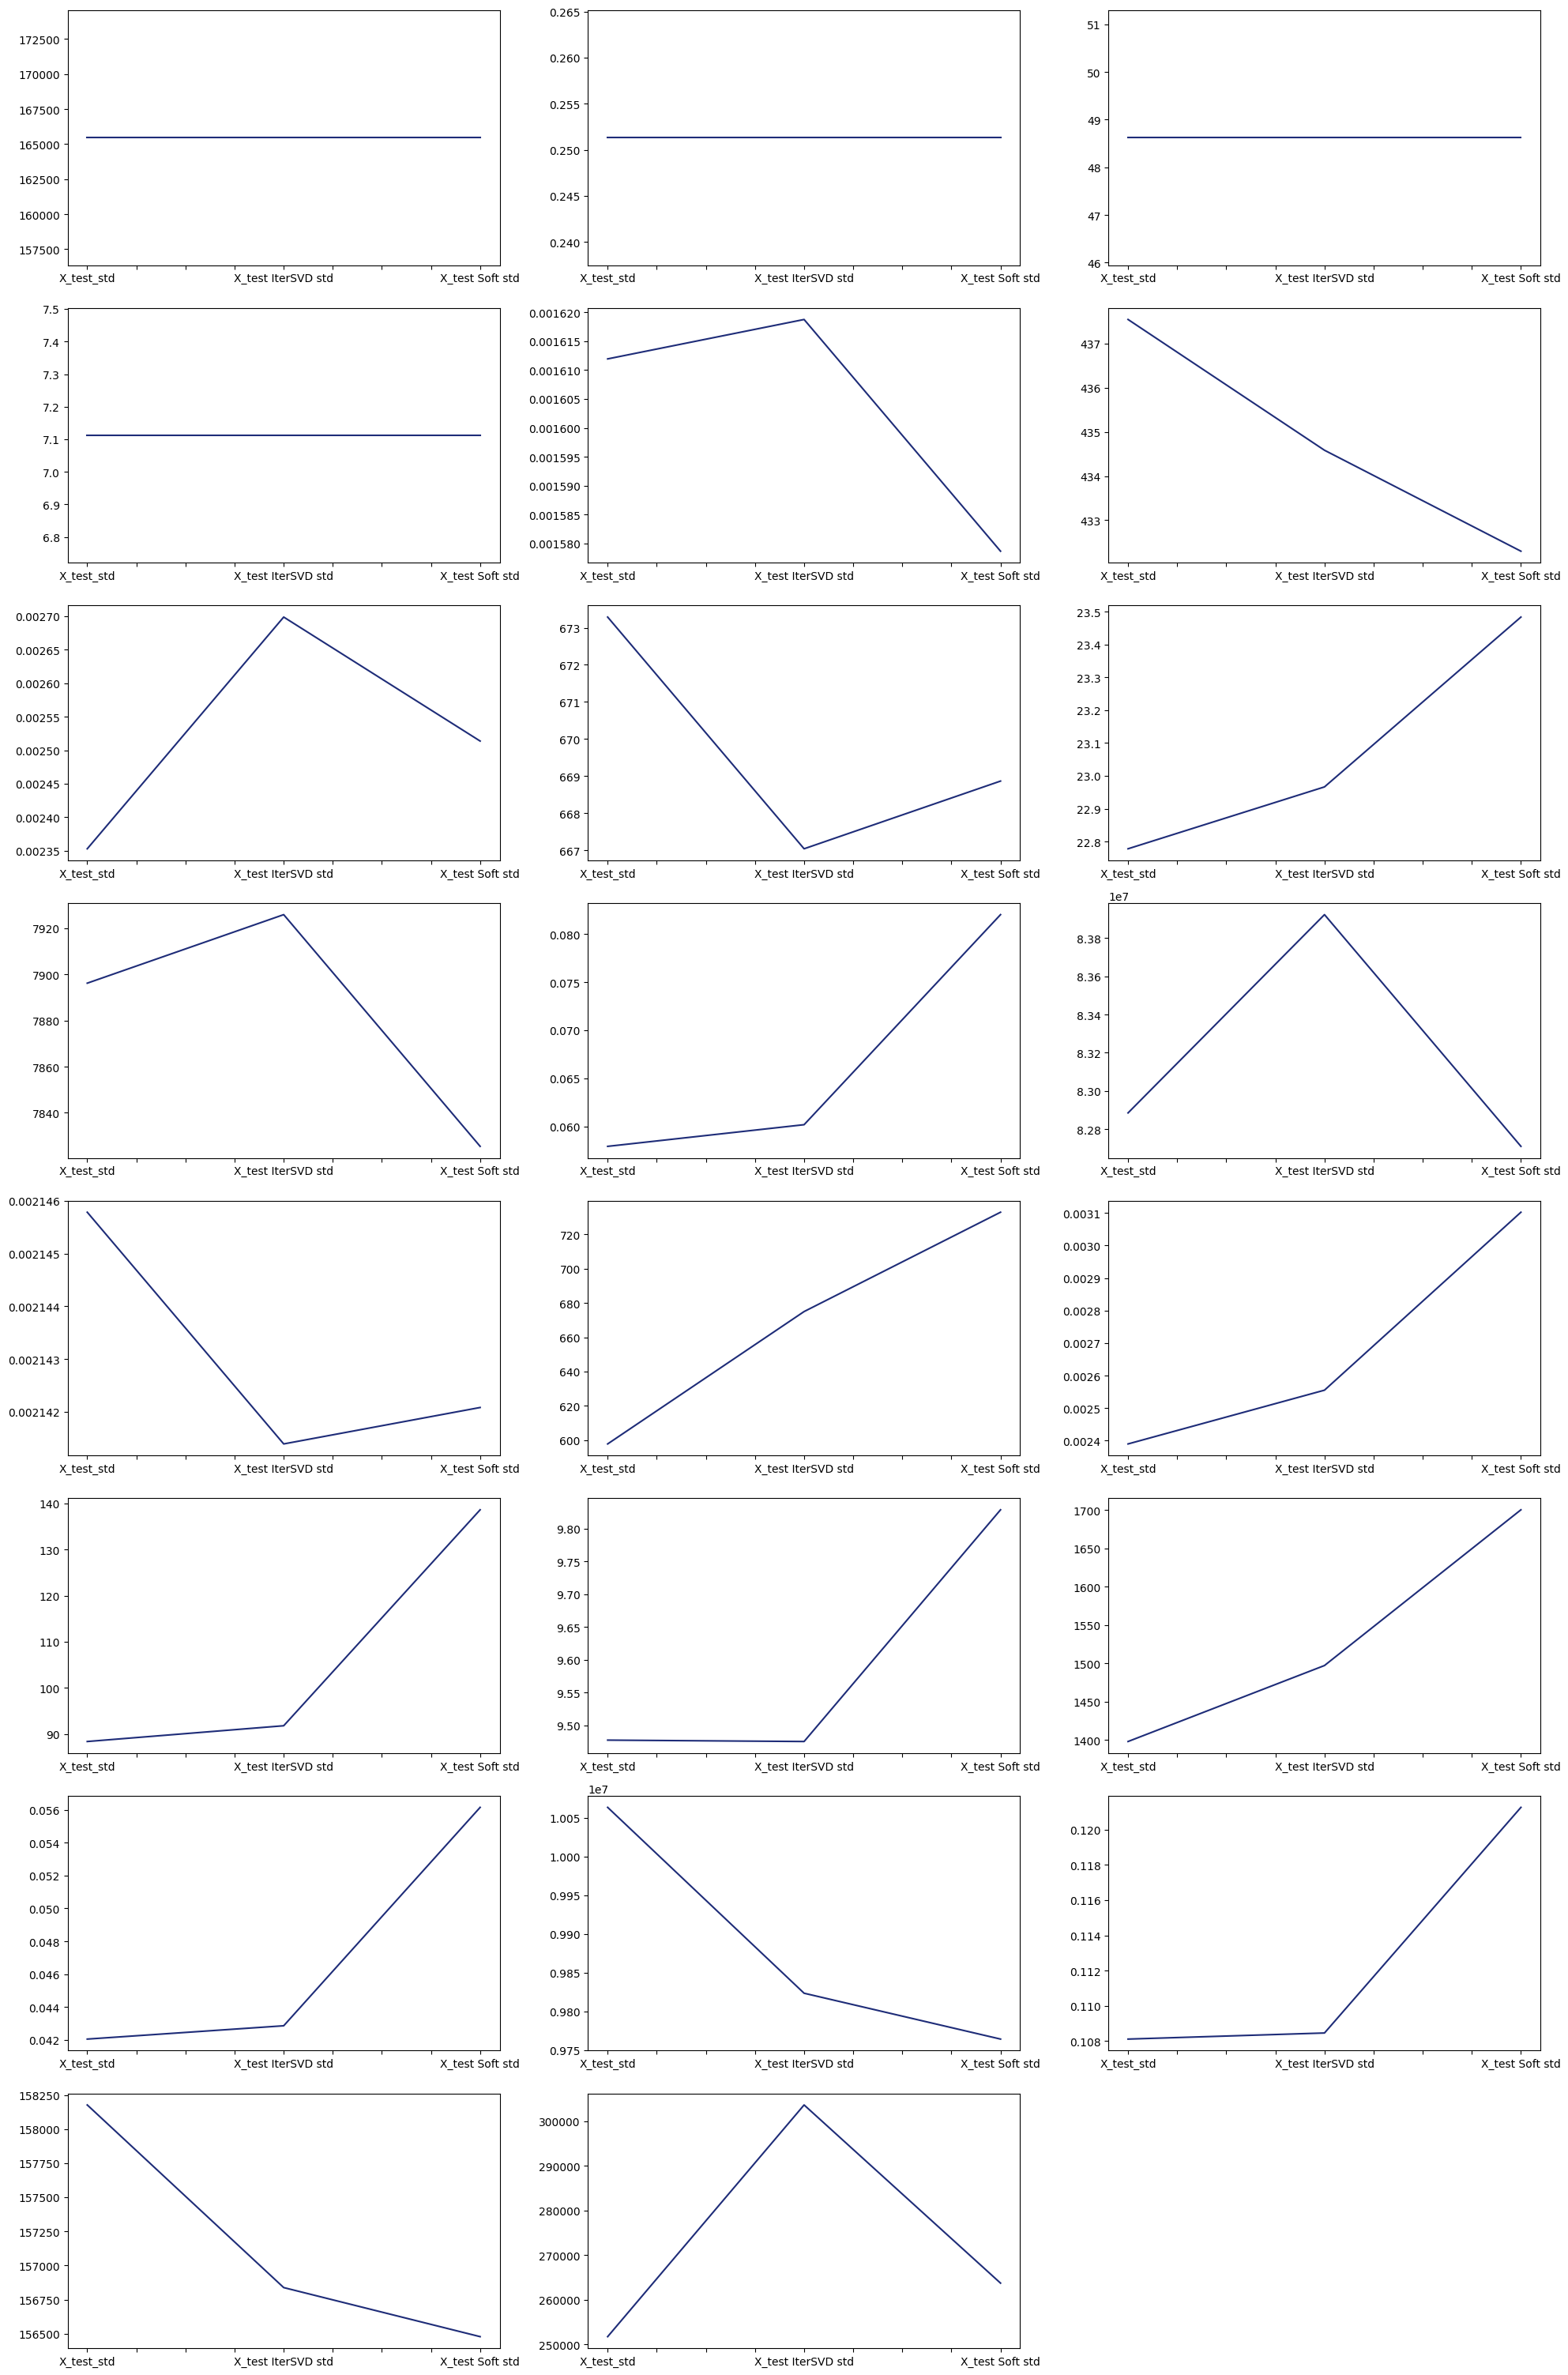

In [51]:
plt.figure(figsize=(20, 45))

for i in range(len(variance_test_df)):
    plt.subplot(12,3,i+1)
    variance_test_df.iloc[i].drop("Changed").plot(kind="line",
                                             color="#1e2c78",
    )
    
plt.tight_layout()